In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r"C:\Users\Danielle\Desktop\history_cleaned.csv")
df.shape

(613, 2)

In [10]:
df.head()

,Time,domain
0,2/18/2021 14:30,www.netflix.com
1,2/18/2021 14:30,www.netflix.com
2,2/18/2021 14:30,www.netflix.com
3,2/18/2021 14:29,www.netflix.com
4,2/18/2021 14:29,www.netflix.com


In [11]:
df.tail()

,Time,domain
608,1600-12-31 19:00:00,www.anaconda.com
609,1600-12-31 19:00:00,www.applyweb.com
610,1600-12-31 19:00:00,www.coursera.org
611,1600-12-31 19:00:00,www.verywellmind.com
612,1600-12-31 19:00:00,www.youtube.com


In [12]:
df.dtypes

Time      object
domain    object
dtype: object

In [13]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900')

19

In [14]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy()

In [15]:
df['Time'] = pd.to_datetime(df['Time'])

In [16]:
df['domain'].value_counts()[:50]

blackboard.umbc.edu                   128
github.com                             59
developer.blackboard.com               45
colab.research.google.com              44
search.yahoo.com                       34
webauth.umbc.edu                       33
vimeo.com                              30
mail.google.com                        24
chatbot.foundations.blackboard.com     23
umbc.eesysoft.com                      22
www.netflix.com                        14
my.umbc.edu                            14
umbc.webex.com                         12
images.search.yahoo.com                10
piazza.com                              8
calendly.com                            8
us-lti.bbcollab.com                     7
www.nasdaq.com                          6
accounts.google.com                     6
stackoverflow.com                       6
www.google.com                          5
intuit.zoom.us                          5
hangouts.google.com                     4
us.bbcollab.com                   

<AxesSubplot:>

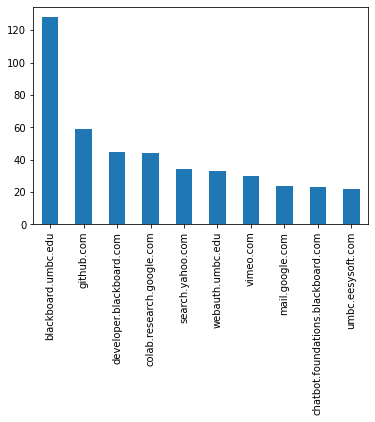

In [17]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [19]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0       3
1       7
10     18
11     21
12     13
14     14
15    151
16     47
17     45
18     60
19     74
20     20
21     41
22     33
23     47
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

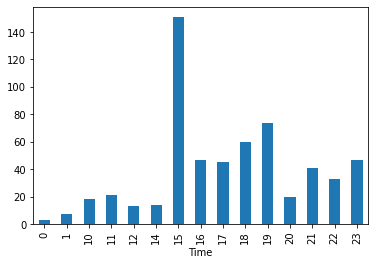

In [20]:
hourly_counts.plot.bar()

In [21]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-02-18 14:30:00,www.netflix.com,Thursday,3
1,2021-02-18 14:30:00,www.netflix.com,Thursday,3
2,2021-02-18 14:30:00,www.netflix.com,Thursday,3
3,2021-02-18 14:29:00,www.netflix.com,Thursday,3
4,2021-02-18 14:29:00,www.netflix.com,Thursday,3


In [22]:
df['Day'].value_counts()

Wednesday    179
Friday       131
Tuesday       89
Sunday        57
Monday        55
Saturday      51
Thursday      32
Name: Day, dtype: int64

In [23]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0     55
1     89
2    179
3     32
4    131
5     51
6     57
Name: DayIndex, dtype: int64

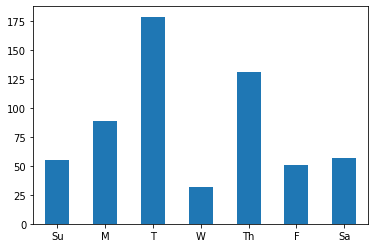

In [24]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['Su','M', 'T', 'W','Th', 'F', 'Sa'], rotation=0)

plt.show()

In [25]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-02-18 14:30:00,www.netflix.com,Thursday,3,False
1,2021-02-18 14:30:00,www.netflix.com,Thursday,3,False
2,2021-02-18 14:30:00,www.netflix.com,Thursday,3,False
3,2021-02-18 14:29:00,www.netflix.com,Thursday,3,False
4,2021-02-18 14:29:00,www.netflix.com,Thursday,3,False


In [26]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]

In [27]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
238,2021-02-14 22:29:00,mail.google.com,Sunday,6,True
239,2021-02-14 22:25:00,blackboard.umbc.edu,Sunday,6,True
240,2021-02-14 22:24:00,developer.blackboard.com,Sunday,6,True
241,2021-02-14 22:24:00,chatbot.foundations.blackboard.com,Sunday,6,True
242,2021-02-14 22:24:00,developer.blackboard.com,Sunday,6,True


In [28]:
weekday['domain'].value_counts()[:5]

blackboard.umbc.edu         108
github.com                   55
developer.blackboard.com     39
webauth.umbc.edu             30
vimeo.com                    30
Name: domain, dtype: int64

In [29]:
weekend['domain'].value_counts()[:5]

colab.research.google.com    27
blackboard.umbc.edu          20
search.yahoo.com             11
www.nasdaq.com                6
developer.blackboard.com      6
Name: domain, dtype: int64

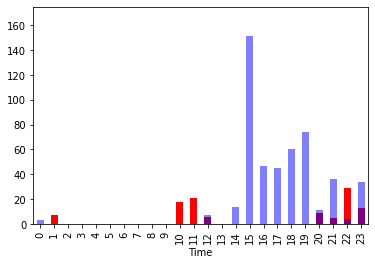

In [36]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 175])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)

In [37]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays

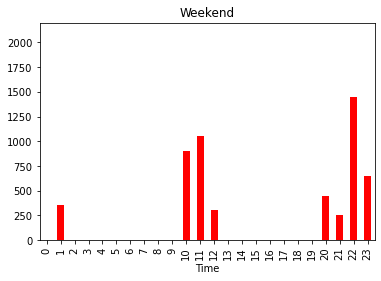

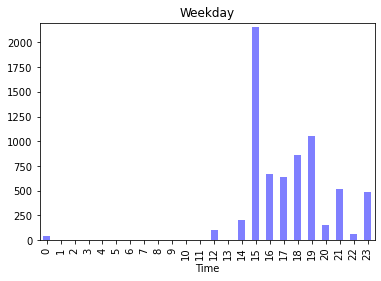

In [42]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 2200]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [43]:
df['domain'].value_counts()[:50]

blackboard.umbc.edu                   128
github.com                             59
developer.blackboard.com               45
colab.research.google.com              44
search.yahoo.com                       34
webauth.umbc.edu                       33
vimeo.com                              30
mail.google.com                        24
chatbot.foundations.blackboard.com     23
umbc.eesysoft.com                      22
www.netflix.com                        14
my.umbc.edu                            14
umbc.webex.com                         12
images.search.yahoo.com                10
piazza.com                              8
calendly.com                            8
us-lti.bbcollab.com                     7
www.nasdaq.com                          6
accounts.google.com                     6
stackoverflow.com                       6
www.google.com                          5
intuit.zoom.us                          5
hangouts.google.com                     4
us.bbcollab.com                   

In [44]:
df['domain'] = df['domain'].astype(str)

In [45]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

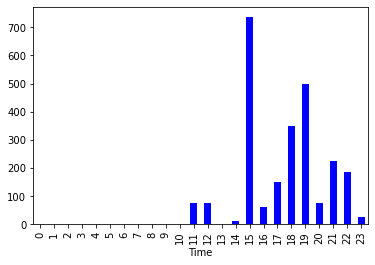

In [47]:
_= show_domain_stats('blackboard', 'blue')

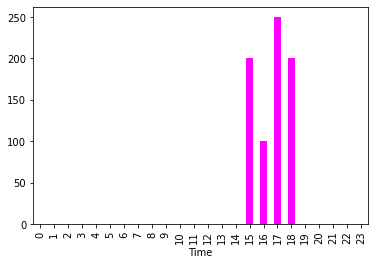

In [48]:
_ = show_domain_stats('vimeo', 'magenta')

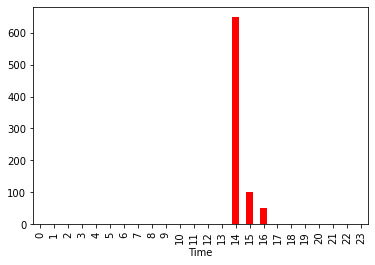

In [49]:
_ = show_domain_stats('netflix', 'red')

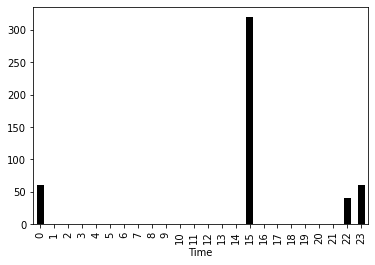

In [52]:
_=show_domain_stats('mail', 'black')

In [53]:
""""
Based on data, what can we tell about this person?
1)Is this a work computer/personal computer? 
This looks like a personal computer. The most visited website is a university webpage. 
There are no logins to work accounts.
2)Is s/he employed? 
Probably not, but s/he could have a part-time job or freelance work that's done at certain hours.
3)What is her/his interests?
Based upon tis data, this person is interested in school, email, the stock market (nasdaq.com),
netflix shows and for some reason the New York City MTA.
4)Anything interesting? The visit to the New York City MTA site. During a pandemic, travel is
unlikely, thus that's an odd site to visit.

Do you give permission for another student to analyze your history_cleaned.csv?
(Your name will stay confidencial)
Yes

What do you think about this assignment? ( 3 sentences at most! )
I liked it. It was a bit hard to pull my csv file from my desktop to my jupyter notebook,
so I searched that and figured it out. This exercise gave me a good sense of some data 
visualization methods that python offers.
"""

'"\nBased on data, what can we tell about this person?\n1)Is this a work computer/personal computer? \nThis looks like a personal computer. The most visited website is a university webpage. \nThere are no logins to work accounts.\n2)Is s/he employed? \nProbably not, but s/he could have a part-time job or freelance work that\'s done at certain hours.\n3)What is her/his interests?\nBased upon tis data, this person is interested in school, email, the stock market (nasdaq.com),\nnetflix shows and for some reason the New York City MTA.\n4)Anything interesting? The visit to the New York City MTA site. During a pandemic, travel is\nunlikely, thus that\'s an odd site to visit.\n\nDo you give permission for another student to analyze your history_cleaned.csv?\n(Your name will stay confidencial)\nYes\n\nWhat do you think about this assignment? ( 3 sentences at most! )\nI liked it. It was a bit hard to pull my csv file from my desktop to my jupyter notebook,\nso I searched that and figured it out